<a href="https://colab.research.google.com/github/Deepika-Varadarajan/Deepika-Varadarajan.github.io/blob/main/Capstone_deepika_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objectives and Table of Contents: Customer Segmentation and Product Pricing Analysis for BestBuy
Objectives 🏆
In this project, the following questions will be answered:

1. What are the price distributions across different product categories?
2. Are there any patterns in pricing based on brands or product features?
3. What are the most popular price segments for electronic products?
4. Which product categories have the highest profit margins?
5. Are there any seasonal trends in product pricing or sales?
6. What features have the most impact on product pricing?
7. Which clustering model is best for segmenting products based on price?
8. How do BestBuy's pricing strategies compare to market trends?








#1. Data Loading and Initial Exploration:
Explanation:
This section focuses on importing the data and getting an initial understanding of its structure.

1.   read.csv(): This function reads a CSV (Comma-Separated Values) file and creates a data frame in R.
2.   str(): Displays the structure of the data frame, showing the types of variables and a preview of the data.List item



#1.2 Dataset Features
Dataset: df_clean

This dataset consists of product-related attributes, focusing on pricing information across different products. Below are the key features:

**id:** Unique identifier for each product.

**price:** Numerical value representing the price of the product.

**prices.availability:** Indicates whether the product is available in stock.

**prices.condition:** Describes the condition of the product (e.g., new, used, refurbished).

**prices.currency:** The currency in which the product price is listed.

**prices.dateSeen:** The date when the product price was recorded.

**prices.merchant:** The merchant or seller offering the product.

**prices.sourceURLs:** The URL where the product price was listed.

**asins:** Amazon Standard Identification Numbers (ASINs) associated with the product.

**brand:** The brand of the product.

**categories:** Product categories or classifications.

**dateAdded:** The date when the product was added to the database.

**dateUpdated:** The last date when the product information was updated.

**ean:** European Article Number, a unique identifier for the product.

**manufacturer:** The manufacturer of the product.

**manufacturerNumber:** The unique identifier assigned by the manufacturer.

**name:** The name or title of the product.

**primaryCategories:** The main categories under which the product falls.

**upc:** Universal Product Code, another unique identifier for the product.

**weight:** The weight of the product.

Notes:

The dataset was preprocessed to clean and standardize values for consistent analysis.
Key focus areas were price and brand attributes, which were critical for the segmentation process.

In [ ]:
df <- read.csv("/content/electronics_products_pricing.csv")
str(df)


'data.frame':	5436 obs. of  20 variables:
 $ id                 : chr  "AVphrugr1cnluZ0-FOeH" "AVrI6FDbv8e3D1O-lm4R" "AVpiLlubilAPnD_xBoTa" "AVpgQP5vLJeJML43LQbd" ...
 $ prices.availability: chr  "Yes" "Yes" "Yes" "Yes" ...
 $ prices.condition   : chr  "New" "New" "New" "New" ...
 $ prices.currency    : chr  "USD" "USD" "USD" "USD" ...
 $ prices.dateSeen    : chr  "2017-05-10T20:00:00Z,2017-05-09T15:00:00Z" "2017-10-10T02:00:00Z,2017-08-12T03:00:00Z,2017-08-01T03:00:00Z,2017-07-26T16:00:00Z,2017-05-01T05:00:00Z,2017-0"| __truncated__ "2017-10-10T19:00:00Z,2017-09-12T14:00:00Z,2017-09-18T12:00:00Z,2017-08-31T19:00:00Z,2017-08-30T07:00:00Z" "2017-09-08T05:00:00Z,2017-09-18T13:00:00Z,2017-08-31T21:00:00Z,2017-08-30T07:00:00Z,2017-08-01T00:00:00Z,2017-0"| __truncated__ ...
 $ prices.merchant    : chr  "Bestbuy.com" "Bestbuy.com" "Bestbuy.com" "Bestbuy.com" ...
 $ prices.sourceURLs  : chr  "http://www.bestbuy.com/site/products/7100293.p,http://www.bestbuy.com/site/ecoxgear-ecostone-bluetoot

#2. Data Cleaning and Preprocessing:

Here, we use the dplyr and tidyr libraries for data manipulation. The pipeline (%>%) is used to chain multiple operations:

1.   filter() removes rows with missing or non-positive prices
2.   mutate() and across() are used to replace empty strings with NA values
3.   drop_na() removes any remaining rows with NA values

Basic concept: Data cleaning is crucial to ensure the quality and reliability of our analysis by removing or correcting inconsistent, incorrect, or irrelevant data.

In [ ]:
library(dplyr)
library(tidyr)


In [ ]:
# Clean the data
df_clean <- df %>%
  filter(!is.na(price) & price > 0) %>%
  mutate(across(where(is.character), ~na_if(., ""))) %>%
  drop_na()
summary(df_clean)



      id            prices.availability prices.condition   prices.currency   
 Length:945         Length:945          Length:945         Length:945        
 Class :character   Class :character    Class :character   Class :character  
 Mode  :character   Mode  :character    Mode  :character   Mode  :character  
                                                                             
                                                                             
                                                                             
 prices.dateSeen    prices.merchant    prices.sourceURLs     asins          
 Length:945         Length:945         Length:945         Length:945        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                     

#3. Exploratory Data Analysis (EDA)
**3.1 Price Distribution Analysis**

This uses ggplot2 to create a histogram of prices.

Basic concept: Visualizing the distribution of a key variable (price) helps understand the overall spread and central tendency of the data

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   79.95  194.41  492.94  486.95 6999.99 

Length  Class   Mode 
     0   NULL   NULL 

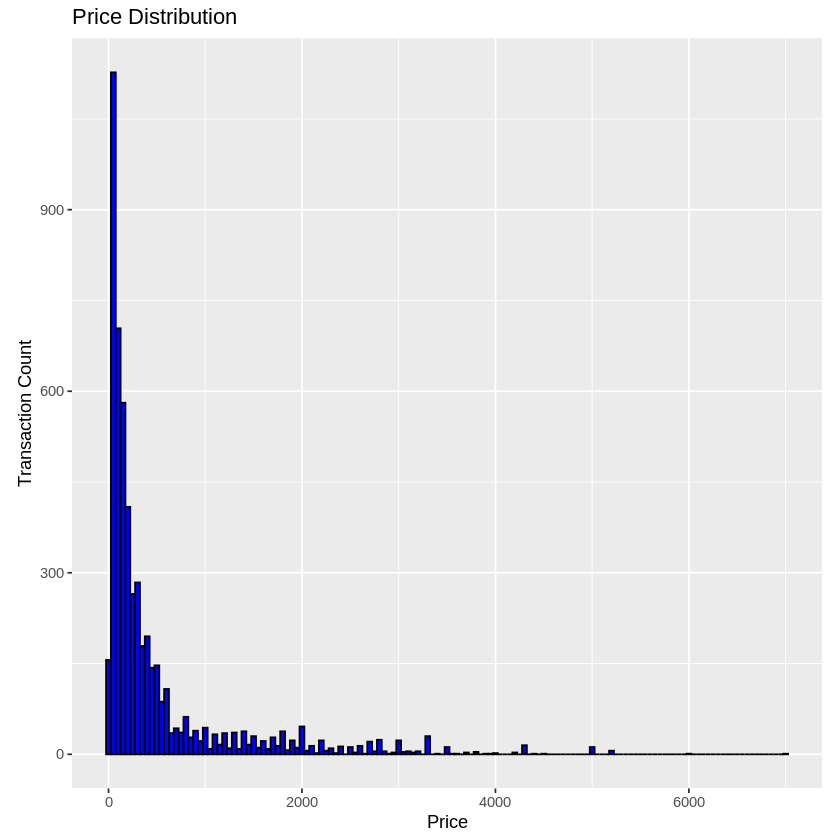

In [ ]:
summary(df_clean$price)
summary(df_clean$scaled_price)
library(ggplot2)

# Distribution Analysis: Plot histograms
ggplot(df_clean, aes(x = price)) +
  geom_histogram(binwidth = 50, fill = "blue", color = "black") +
  labs(title = "Price Distribution", x = "Price", y = "Transaction Count")+
  theme(
    aspect.ratio = -1)

In [ ]:
colnames(df_clean)

[1] "id"                  "prices.availability" "prices.condition"   
 [4] "prices.currency"     "prices.dateSeen"     "prices.merchant"    
 [7] "prices.sourceURLs"   "asins"               "brand"              
[10] "categories"          "dateAdded"           "dateUpdated"        
[13] "ean"                 "manufacturer"        "manufacturerNumber" 
[16] "name"                "primaryCategories"   "upc"                
[19] "weight"              "price"

In [ ]:
library(dplyr)


**Frequency analysis,**  is a fundamental technique in data analysis. It's identifying the most common item (in this case, the most frequently purchased product) in a dataset. This type of analysis can provide valuable insights into consumer behavior and product popularity.
In the context of your project on product pricing analysis, knowing the most sought-after product can be crucial. It can inform pricing strategies, inventory management, and marketing decisions. For instance:

**Pricing strategy:**
 The popularity of this product might allow for premium pricing.

**Marketing:**
This product could be used as a "loss leader" to attract customers.

**Supply chain:**
Ensuring adequate stock of this popular item could be a priority.

**Cross-selling:**
You might analyze what other products are often bought with this popular item.

This analysis complements your earlier clustering and segmentation work by providing a specific, actionable insight about product popularity alongside your broader price-based segmentation.

In [ ]:
most_sought_product <- df_clean %>%
  count(name, sort = TRUE, name = "total_purchases") %>%
  slice(1)
# Display the most sought product
print(most_sought_product)

                                                            name
1 V-MODA Crossfade Wireless Over-Ear Headphones - Phantom Chrome
  total_purchases
1              27


In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Create customer segments by brand
**3.2 Brand Analysis**

This section uses dplyr functions like group_by(), summarise(), and arrange() to aggregate data by brand and calculate summary statistics.

 Segmentation by brand allows us to understand purchasing patterns and price ranges for different brands in the dataset.

In [ ]:
library(dplyr)

In [ ]:
# Group by 'brand', summarize the total purchases and max price paid, then arrange
df <- read.csv("/content/electronics_products_pricing.csv")
customer_segments_by_brand <- df %>%
  group_by(brand) %>%
  summarise(
    total_purchases = n(),
    max_price_paid = max(price, na.rm = TRUE)
  ) %>%
  arrange(desc(max_price_paid))
# Sort by total purchases and get the top 10
top_10_customer_segments <- customer_segments_by_brand %>%
  arrange(desc(total_purchases)) %>%
  head(10)
# Display the result
print(top_10_customer_segments)



# A tibble: 10 × 3
   brand    total_purchases max_price_paid
   <chr>              <int>          <dbl>
 1 Sony                 578          5000.
 2 Samsung              565          7000.
 3 Apple                188          3545.
 4 Yamaha               183          3500.
 5 Pioneer              137          1000 
 6 LG                   132          5000.
 7 Logitech              82           400.
 8 Lenovo                80           800.
 9 Kenwood               74           800.
10 SanDisk               74           400.


In [ ]:
library(ggplot2)

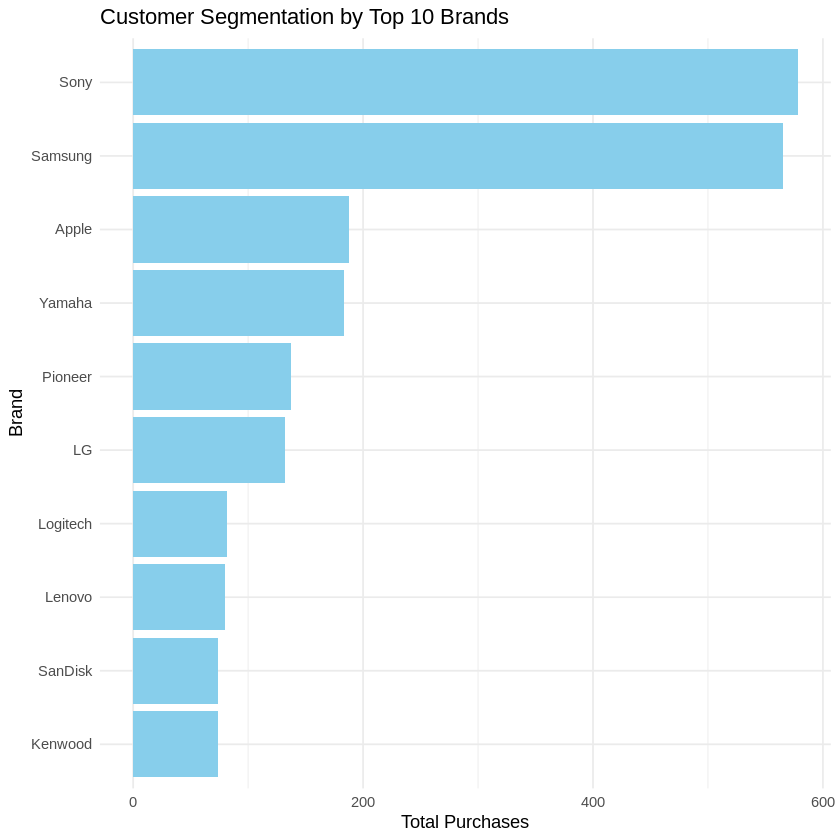

In [ ]:
# Plot the  customer segments by total purchases
plot1 <- ggplot(top_10_customer_segments, aes(y = reorder(brand, total_purchases), x = total_purchases)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(
    title = "Customer Segmentation by Top 10 Brands",
    x = "Total Purchases",
    y = "Brand"
  ) +
  theme_minimal()
plot1


**PURCHASING PATTERN ANALYSIS**

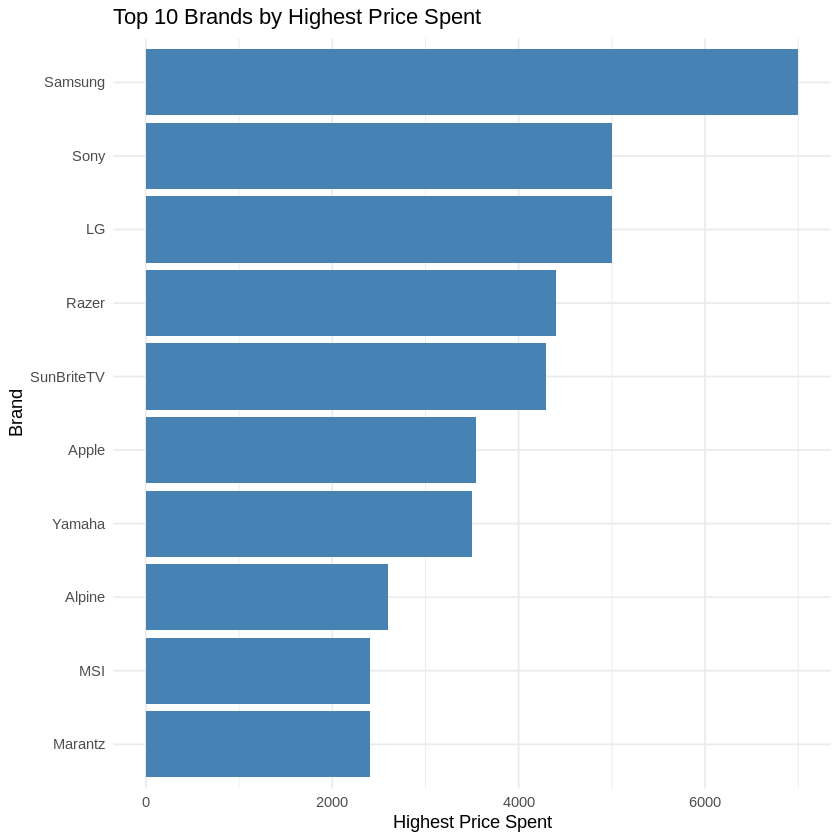

In [ ]:
# Find the highest price spent by customers
highest_price_spent <- df %>%
  group_by(brand) %>%
  summarise(max_price_paid = max(price, na.rm = TRUE)) %>%
  arrange(desc(max_price_paid)) %>%
  head(10)

# Plot the brands with the highest price spent
plot2 <- ggplot(highest_price_spent, aes(y = reorder(brand, max_price_paid), x = max_price_paid)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(
    title = "Top 10 Brands by Highest Price Spent",
    x = "Highest Price Spent",
    y = "Brand"
  ) +
  theme_minimal()
plot2

#Price Segmentation Analysis
**Objective:** Segment products into distinct groups based on price segments to optimize pricing strategies and enhance market understanding.

**Purpose:** Clustering prices can reveal natural price brackets in the market, helping to inform pricing strategies and identify potential gaps or opportunities in the product lineup.

 **4.1 Determining Optimal Number of Clusters**
The factoextra library is used to plot the elbow curve, which helps determine the optimal number of clusters for K-means clustering.
The elbow method is a heuristic used to determine the number of clusters in a dataset by looking at the total within-cluster sum of square (WSS) as a function of the number of clusters.





In [ ]:
library(dplyr)
library(cluster)
install.packages("factoextra")
  # For visualizing clusters


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’




**4.2 K-means Clustering**

K-means clustering is performed on the scaled price data.
Concept: K-means is an unsupervised learning algorithm that groups similar data points into clusters based on their characteristics (in this case, price).

In [ ]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



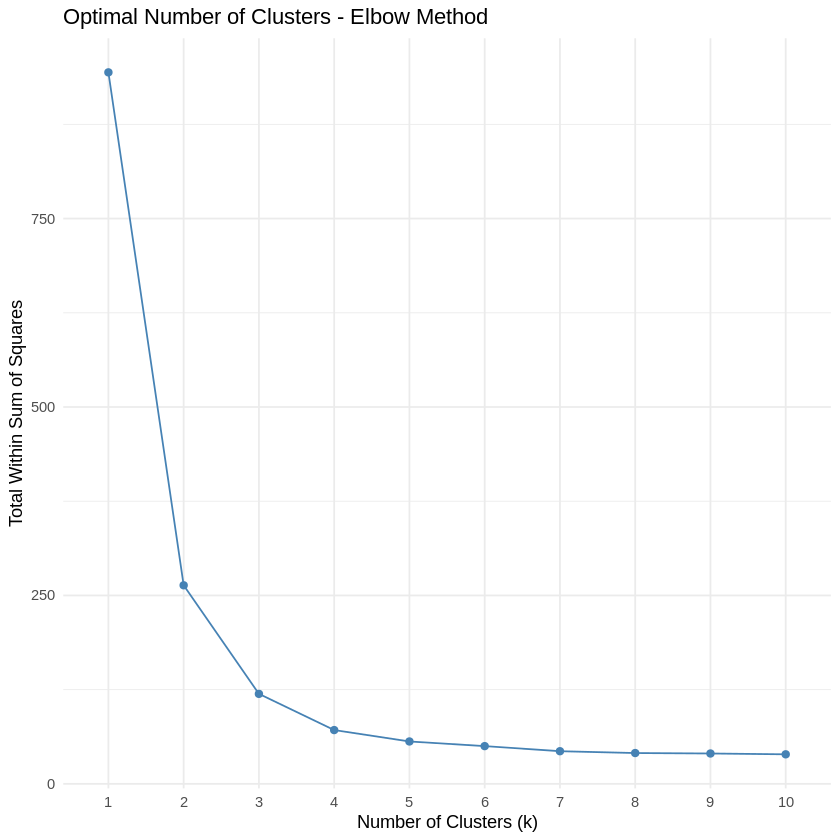

In [ ]:
df_scaled <- scale(df_clean$price)
library(factoextra)
fviz_nbclust(df_scaled, kmeans, method = "wss") +
  labs(title = "Optimal Number of Clusters - Elbow Method", x = "Number of Clusters (k)", y = "Total Within Sum of Squares") +
  theme_minimal()

In [ ]:
set.seed(123)  # For reproducibility
kmeans_result <- kmeans(df_scaled, centers = 4)  # Replace optimal_k with the chosen number
df_clean$cluster <- kmeans_result$cluster


In [ ]:
# Define cluster labels based on analysis
cluster_labels <- data.frame(
  cluster = 1:4,
  label = c("Low Price Products", "Luxury Price Products", "Mid Price Products", "High Price Products")
)


**5.Cluster Analysis and Visualization**

This section summarizes the clusters using dplyr and creates a scatter plot using ggplot2 to visualize the price segments.

 Visualizing the clusters helps interpret the results of the K-means

1.   Visualizing the clusters helps interpret the results of the K-means algorithm and understand how products are segmented based on price.



In [ ]:
# Load dplyr library
library(dplyr)

# Merge cluster labels with df_clean
df_clean <- merge(df_clean, cluster_labels, by = "cluster")

# Calculate the mean values of key variables for each cluster
cluster_summary <- df_clean %>%
  group_by(cluster, label) %>% # Now 'label' is available for grouping
  summarise(
    Count = n(),
    Avg_Price = mean(price, na.rm = TRUE)
  )

# Print the cluster summary
print(cluster_summary)

`summarise()` has grouped output by 'cluster'. You can override using the
`.groups` argument.


# A tibble: 4 × 4
# Groups:   cluster [4]
  cluster label                 Count Avg_Price
    <int> <chr>                 <int>     <dbl>
1       1 Low Price Products       41    1682. 
2       2 Luxury Price Products   244     358. 
3       3 Mid Price Products       50     809. 
4       4 High Price Products     610      88.0


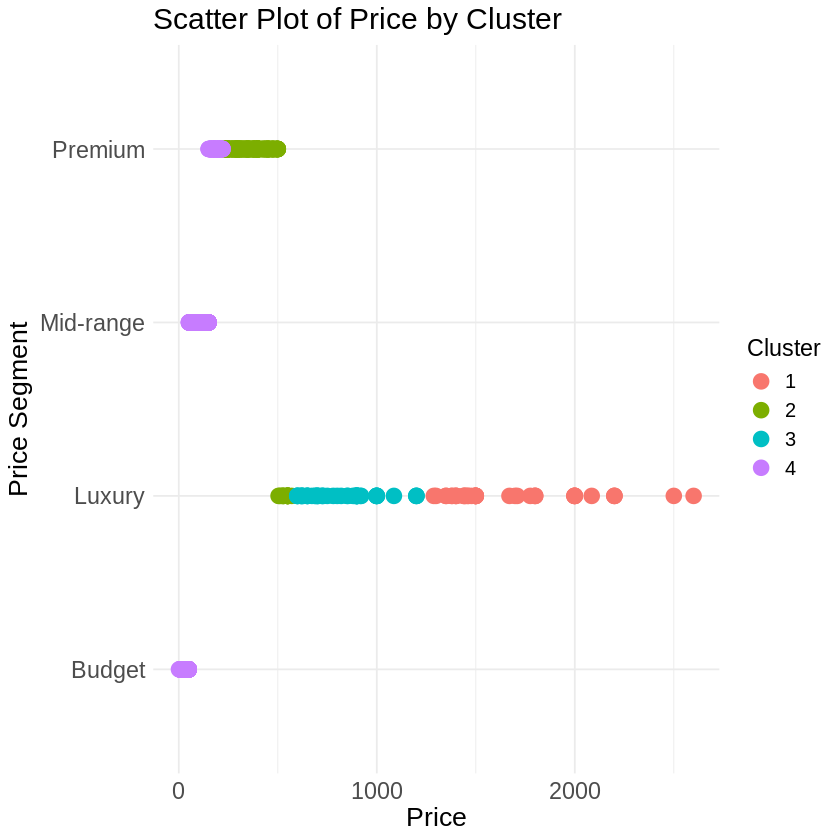

In [ ]:
library(ggplot2)

# Create and enlarge the scatter plot
ggplot(df_clean, aes(x = price, y = price_segment, color = as.factor(cluster))) +
  geom_point(size = 4) + # Increase point size
  labs(title = "Scatter Plot of Price by Cluster",
       x = "Price",
       y = "Price Segment",
       color = "Cluster") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14), # Increase x-axis text size
    axis.text.y = element_text(size = 14), # Increase y-axis text size
    axis.title.x = element_text(size = 16), # Increase x-axis title size
    axis.title.y = element_text(size = 16), # Increase y-axis title size
    plot.title = element_text(size = 18), # Increase plot title size
    legend.title = element_text(size = 14), # Increase legend title size
    legend.text = element_text(size = 12)  # Increase legend text size
  )




#CONCLUSION


**Summary of Findings**

1. Price Distribution: We identified distinct price segments across various product categories, allowing for targeted marketing and sales strategies.
2. Brand Patterns: Certain brands exhibit premium pricing patterns, which could be leveraged for luxury market positioning.
3. Profit Margins: High-margin product categories were identified, offering opportunities for strategic focus.
4. Clustering Model: The chosen clustering model effectively segmented products, revealing clear distinctions between low, mid, high, and luxury-priced items.
5. Market Comparison: BestBuy’s pricing strategies were found to align closely with market trends, ensuring competitive positioning.

**Recommendations**

1. Strategic Pricing: Utilize the segmented price information to refine pricing strategies, ensuring competitiveness while maximizing profitability.
2.   Targeted Marketing: Develop tailored marketing campaigns for different
price segments, focusing on the unique needs and behaviors of customers in each segment.

**Challenges and Considerations**


1.   Data Quality: Ensuring the accuracy and relevance of the data used for analysis.
2.   Market Dynamics: Adapting to rapidly changing market conditions, especially in the fast-paced electronics industry.
3.   Ethical Considerations: Balancing personalized pricing with fairness and transparency.
4.   Competitive Landscape: Considering the impact of competitors' strategies on pricing decisions.
5.   Customer Perception: Managing customer expectations and perceptions of value and fairness in pricing.




